# Dataset Preparation

## 1. Data Download

Download [FreiHAND](https://github.com/lmb-freiburg/freihand) dataset from *url*.

In [1]:
from model.dataset import FreiHANDDownloader

downloader = FreiHANDDownloader()
downloader

FreiHANDDownloader [Dir: /home/sebaq/Documents/GitHub/ML_project/FreiHAND; Downloaded: True]

In [2]:
downloader.download()

INFO: Dataset is already downloaded at /home/sebaq/Documents/GitHub/ML_project/FreiHAND


## 2. 2D Points Data Conversion

We use Camera and 3D points to convert points to 2 dimensions.

In [3]:
from model.dataset import FreiHAND2DConverter

converter = FreiHAND2DConverter()
converter

FreiHAND2DConverter [File: /home/sebaq/Documents/GitHub/ML_project/FreiHAND/training_xy.json; Converted: True]

In [4]:
converter.convert_2d()

INFO: 3D-to-2D conversion is already performed


## 3. Dataset Split

Let's take a look to the dimensionality of Training, Validation and Test set, basing on settings.

In [7]:
from model.dataset import FreiHANDSplitter
from settings import DATA, PRC

split = FreiHANDSplitter(
    n=DATA["n_data"], 
    percentages=list(PRC.values())
)

We compute means and standard deviation, for any channel that will be later on used for normalization.

In [8]:
from os import path
from io_ import get_mean_std_file, read_means_stds

# If computed yet, means and standard deviations are not computed again
if not path.exists(get_mean_std_file()):
    means, stds = split.training_mean_std()
else:
    means, stds  = read_means_stds() 

In [9]:
for name, values in zip(["means", "stds"], [means, stds]):
    r, g, b = values
    print(f"{name}: [r: {r}, g: {g}, b: {b}]")

means: [r: 0.395, g: 0.4323, b: 0.2954]
stds: [r: 0.1966, g: 0.1734, b: 0.1836]


## 4. The Collection

Let's take a look to some example from the training set.

Loading the collection loader.

In [10]:
from model.hand import HandCollection

collection = HandCollection()
collection

HandCollection

Selecting random images from the Training Set.

In [11]:
from random import sample

n = 8  # n. of images to display

# Getting random indexes from training set
display_idx = sample(population=split.train_idx, k=n)

# Loading images
hands = [collection[i] for i in display_idx]

Dispalay raw images:

Raw image 00023653.jpg:


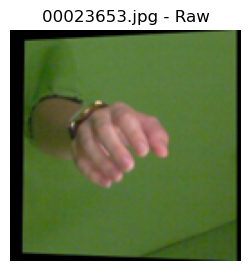

Raw image 00007402.jpg:


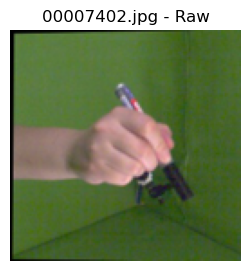

Raw image 00017012.jpg:


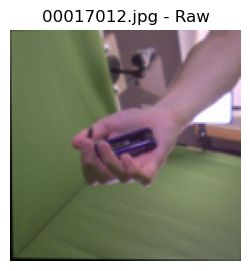

Raw image 00009707.jpg:


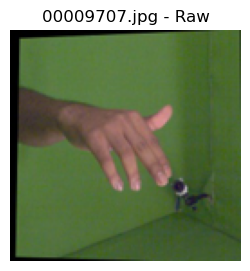

Raw image 00001976.jpg:


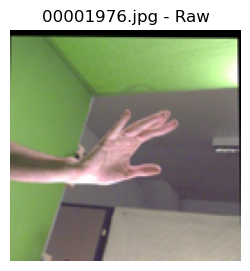

Raw image 00002549.jpg:


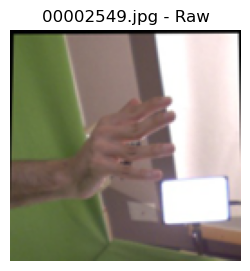

Raw image 00020521.jpg:


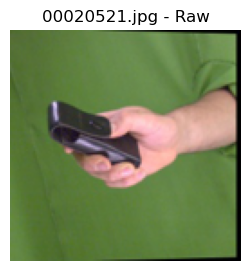

Raw image 00006909.jpg:


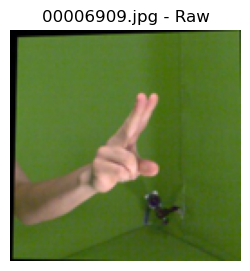

In [12]:
for hand in hands:
    print(f"Raw image {hand.idx}:")
    hand.plot_image()

We also take a look to their skeletons.

Skeleton of 00023653.jpg:


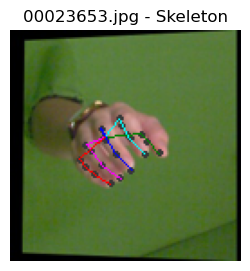

Skeleton of 00007402.jpg:


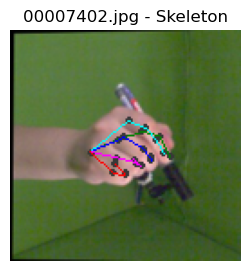

Skeleton of 00017012.jpg:


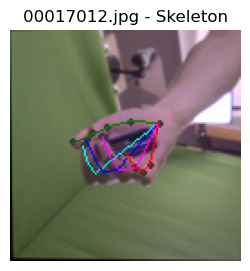

Skeleton of 00009707.jpg:


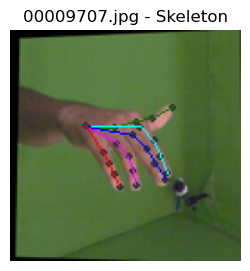

Skeleton of 00001976.jpg:


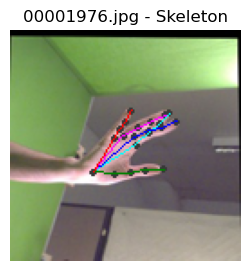

Skeleton of 00002549.jpg:


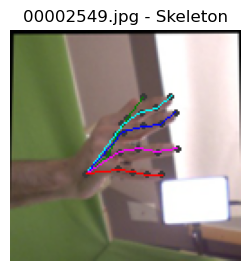

Skeleton of 00020521.jpg:


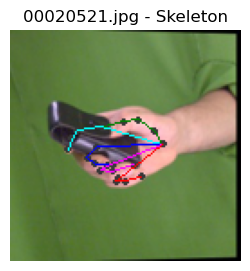

Skeleton of 00006909.jpg:


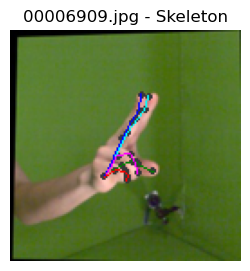

In [13]:
for hand in hands:
    print(f"Skeleton of {hand.idx}:")
    hand.plot_skeleton()

## 5. Data Preparation

We convert:
- images by applying mean-max scaling and Z-normalization;
- keypoints to heatmaps.

Network input for 00023653.jpg:


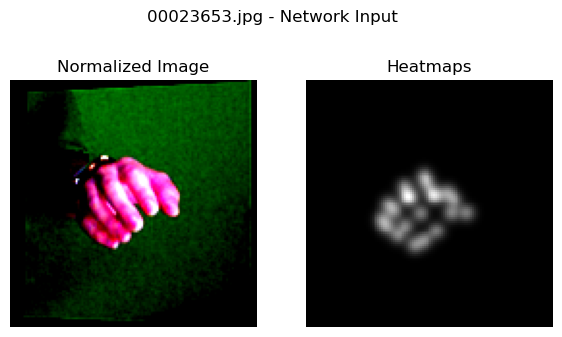

Network input for 00007402.jpg:


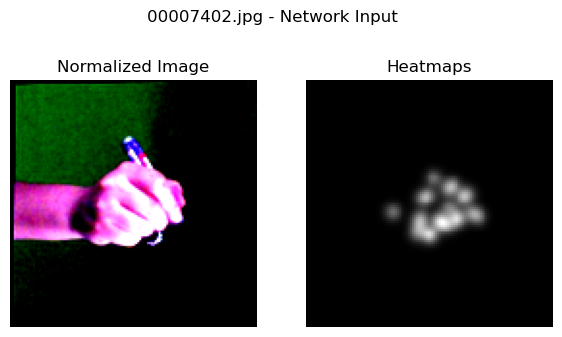

Network input for 00017012.jpg:


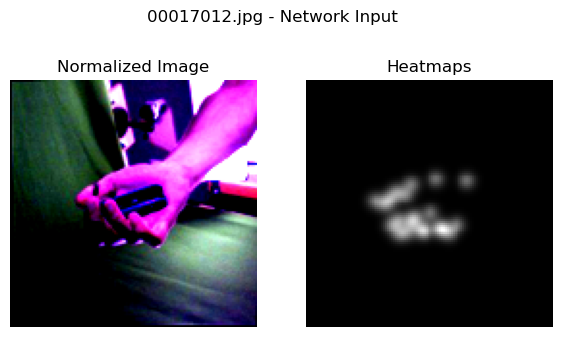

Network input for 00009707.jpg:


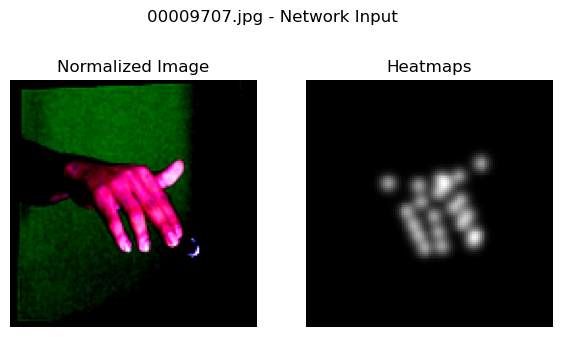

Network input for 00001976.jpg:


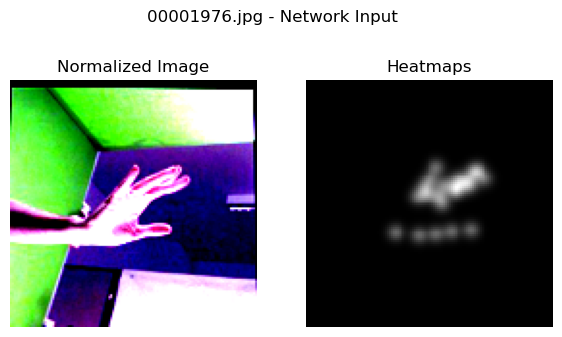

Network input for 00002549.jpg:


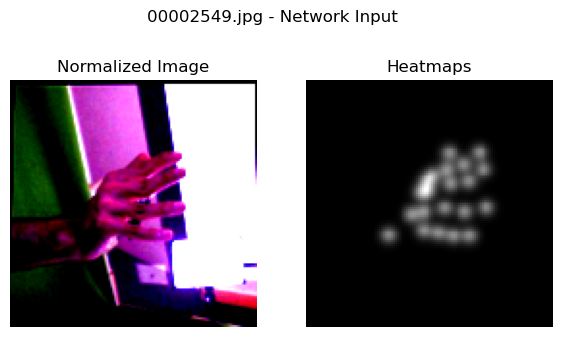

Network input for 00020521.jpg:


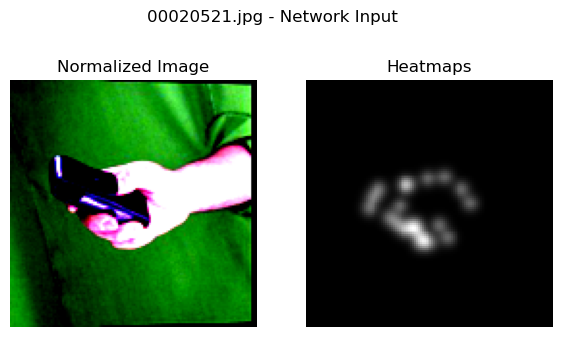

Network input for 00006909.jpg:


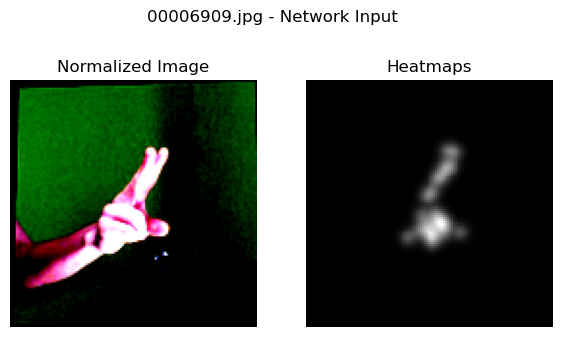

In [14]:
for hand in hands:
    print(f"Network input for {hand.idx}:")
    hand.plot_network_input()      